# Regression and Prediction

## Simple Linear Regression

Simple linear regression models the relationship between the magnitude of one variable X and a second Y. The difference between SLR and correlation is that while correlation measures the strength of an association between two variables, regression quantifies the nature of the relationship.

## Regression equation

Simple linear regression estimates how much Y will change when X changes. We are trying to predict the Y variable from X using a linear relationship.

Y=b0+b1X

### Using a set of data to build linear regression model


In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
df = pd.read_csv("sleepdata2.csv") 

# Preview the first 5 lines of the loaded data 
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Time edit
0,2017-11-27 23:11:00,2017-11-28 06:09:09,62,6.58,,,0,1564,7.0
1,2017-11-29 00:41:04,2017-11-29 07:09:51,59,6.28,,Aerial:Worked out,0,8144,7.0
2,2017-11-29 23:53:11,2017-11-30 07:27:05,91,7.33,,,0,6707,8.0
3,2017-11-30 23:07:29,2017-12-01 05:58:18,79,6.50,,,0,4778,7.0
4,2017-12-01 23:19:21,2017-12-02 05:58:20,77,6.38,,Pole fitness:Worked out,0,7111,7.0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 9 columns):
Start                339 non-null object
 End                 339 non-null object
 Sleep quality       339 non-null int64
 Time in bed         339 non-null float64
 Wake up             339 non-null object
 Sleep Notes         339 non-null object
 Heart rate          339 non-null int64
 Activity (steps)    339 non-null int64
Time edit            338 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 23.9+ KB


## Interpreting my sleep data 

I want to know what my sleep quality is related to. I'm interested in two potential variables: time spent in bed and activity (number of steps). From checking the information regarding my data frame I notice that Time edit rounded up to the nearest hour is a float and not an integer. So in the next few steps I will clean my data and then perform linear regression. 

First, I am going to import linear regression from sci-kit learn module. Then I am doing to drop the Sleep quality column as I want only the parameters as my X values. I'm going to store linear regression objects in a variable called lm.

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# convert column "Time edit" to integer
df = df.astype({" Time in bed": int})

#This creates a LinearRegression object
lm = LinearRegression()

#I want to know if my time in bed or activity effects my sleep quality
X_Time_in_Bed= df[[' Time in bed']]
X_Activity= df[[' Activity (steps)']]
Y= df[[' Sleep quality']]


### Inside the linear regression object

**lm.fit()** - > fits a linear model

**lm.predict()** -> predicts Y using the linear model with estimated coefficients

**lm.score()** -> Returns the coefficient of determination (R^2)

**lm.coef_** -> Estimated coefficients

**lm.intercept_** -> Estimated intercept

## Fitting a Linear Model


In [4]:
lm.fit(X_Time_in_Bed,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

I am going to print the intercept and number of coefficients

In [5]:
print('Estimated coefficient:', lm.coef_)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated coefficient: [[9.32179818]]
Estimated intercept coefficient: [12.1999852]
Number of coefficients: 1


The regression coefficient can be interpreted as for each extra hour of sleep I get, my sleep quality is increased by 9.3%. The intercept 12.4 can be interpretted as the predicted sleep quality percentage I get if I sleep for zero hours. Not so realistic.

The regression line from this model is displayed below:

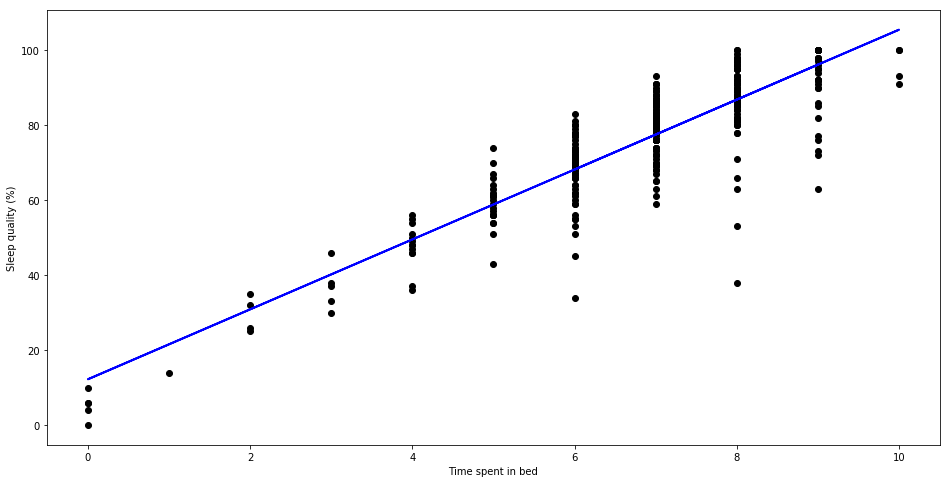

In [6]:
predictions = lm.predict(X_Time_in_Bed)


plt.figure(figsize=(16, 8))
plt.scatter(
    X_Time_in_Bed,
    Y,
    c='black'
)

plt.plot(
    X_Time_in_Bed,
    predictions,
    c='blue',
    linewidth=2
)

plt.xlabel("Time spent in bed")
plt.ylabel("Sleep quality (%)")
plt.show()

Seems good to me. Sleep quality appears to be related to time spent in bed


## Assessing the relevancy of the model
To see if the model is any good, we need to look at the R² value and the p-value from each coefficient. The regression line is the estimate that minimises the sum of squared residual values (RSS). The method of minimising the sum of squared residuals is termed least squares regression of ordinary least squares (OLS). 

In [7]:
X2 = sm.add_constant(X_Time_in_Bed)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Sleep quality   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1149.
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          1.25e-110
Time:                        11:00:20   Log-Likelihood:                -1205.7
No. Observations:                 339   AIC:                             2415.
Df Residuals:                     337   BIC:                             2423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.2000      1.917      6.364   

Looking at both coefficients, we have a p-value that is very low (p<0.01). This means that there is a strong correlation between these coefficients and the target (Sleep quality (%)).
Then, looking at the R² value, we have 0.773. Therefore, about 77% of the variability of my sleep quality is 
explained by the number of hours sleep that I get.